#Step 1: Import Required Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Step 2: Load the Dataset

In [68]:
df = pd.read_csv("/content/netflix1.csv")

#Step 3: Data Cleaning
**Identify and handle missing data, correct data types, and drop duplicates**

In [69]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [70]:
df.shape

(8790, 10)

In [71]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [72]:
df.duplicated().sum()

0

In [73]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [74]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [75]:
# Count the number of Movies and TV Shows
type_counts = df['type'].value_counts()

In [76]:
type_counts

,count
type,
Movie,6126
TV Show,2664


# Step 4: Exploratory Data Analysis (EDA)
###1. Content Type Distribution (Movies vs. TV Shows


<ipython-input-77-64702bf9cd59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type_counts.index,y=type_counts.values,palette='Set2')


Text(0, 0.5, 'Count')

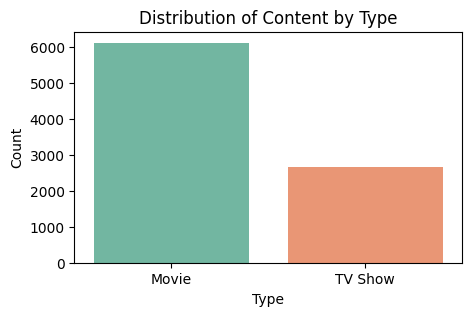

In [77]:
# Plot the distribution
plt.figure(figsize=(5,3))
sns.barplot(x = type_counts.index,y=type_counts.values,palette='Set2')
plt.title("Distribution of Content by Type")
plt.xlabel("Type")
plt.ylabel("Count")

## 2. most common Genres


<ipython-input-78-6448e8deb731>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,


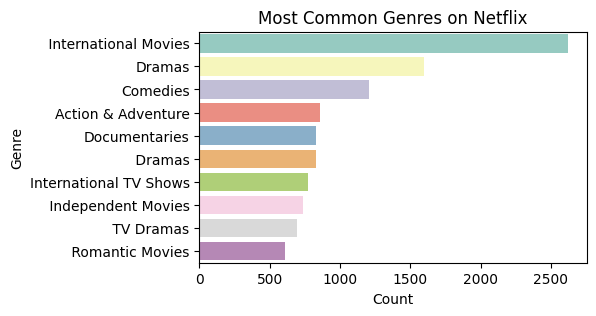

In [78]:
# Split the 'listed_in' column and count genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot the most common genres
plt.figure(figsize=(5,3))
sns.barplot(x=genre_counts.values, y=genre_counts.index,
palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


##3. Content Added Over Time


<ipython-input-79-e5028359545e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='PiYG')


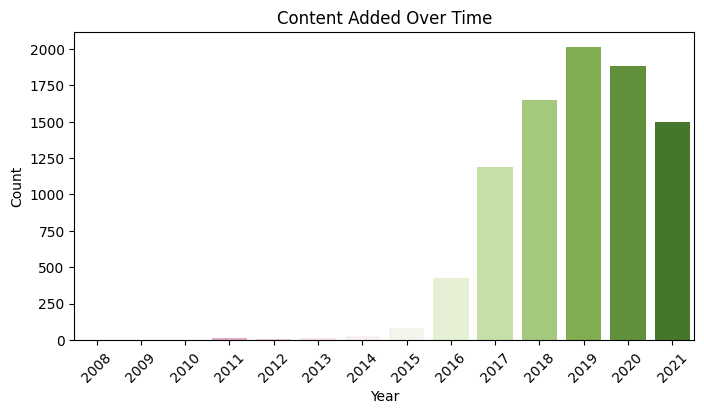

In [79]:
# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
# Plot content added over the years
plt.figure(figsize=(8,4))
sns.countplot(x='year_added', data=df, palette='PiYG')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##4. Top 10 Directors with the Most Titles

<ipython-input-161-8197d6001de8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index,


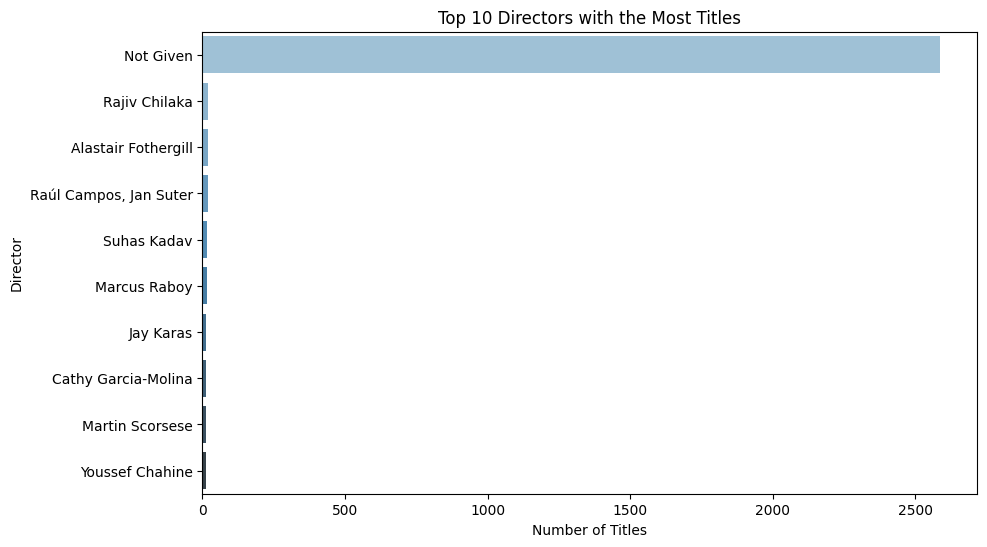

In [161]:
# Count titles by director
top_directors = df['director'].value_counts().head(10)
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index,
palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

##5. Word Cloud of Movie Titles

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
 11  year_added    8790 non-null   int32         
 12  month_added   8790 non-null   int32         
 13  year          8790 non-null   int32         
 14  month         8790 non-null   int32         
 15  day           8790 non-null   int32   

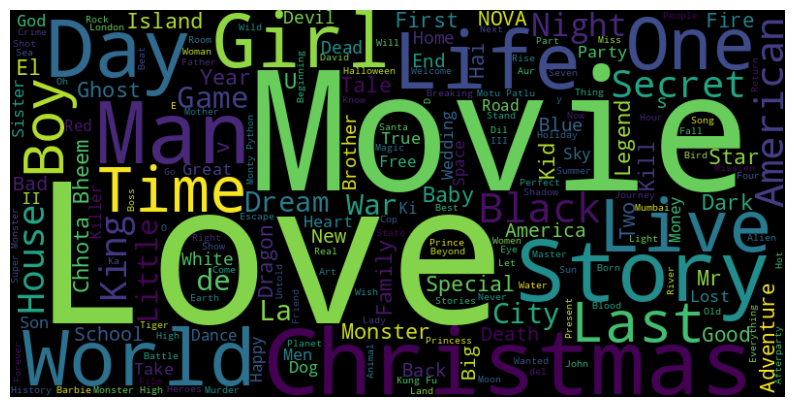

In [163]:

from wordcloud import WordCloud  # Ensure you have this import

# Generate word cloud
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()  # Don't forget to show the plot

#Step 5: Conclusion and Insights
###In this project, we:
###1. **Cleaned the data** by handling missing values, removing duplicates, and converting data types.
###2. **Explored the data** through various visualizations such as bar plots and word clouds.
###3. **Analyzed content trend**s over time, identified popular genres, and highlighted top directors.


#Step 6: Next Steps
###1. **Feature Engineering**: Create new features, such as counting the number of genres per movie or extracting the duration in minutes.
###2. **Machine Learning**: Use the cleaned and processed data to build models for recommendations or trend predictions.
###3. **Advanced Visualization**: Use interactive plots or dashboards for more detailed analysis.

#Content distribution on Netflix.


In [164]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


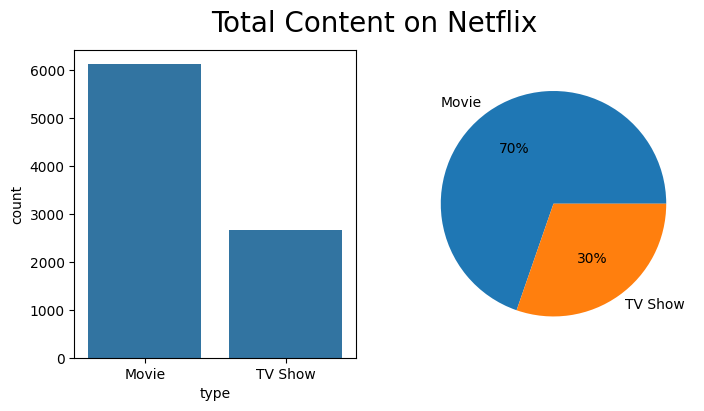

In [165]:
freq=df['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(df, x=df['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.show()

##Visual representation of rating frequency of movies and TV Shows on Netflix.

In [166]:
df['rating'].value_counts()


,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


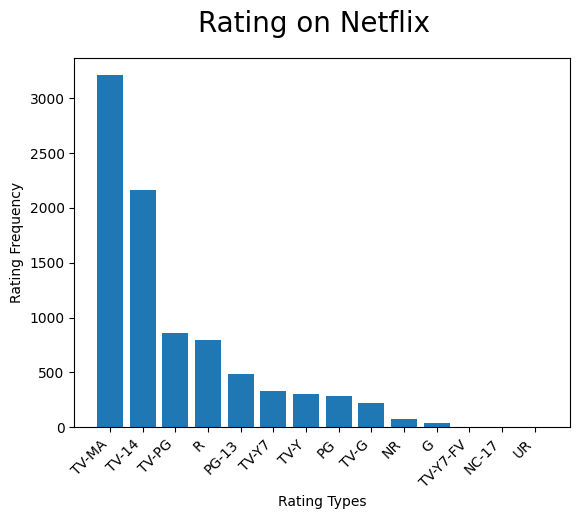

In [167]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()

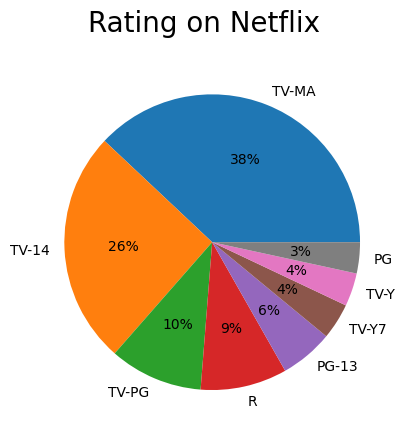

In [168]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()

#Converting date_added column to datetime

In [169]:
# lets convert column date_added to datetime.
df['date_added']=pd.to_datetime(df['date_added'])

In [170]:
df.describe()

,date_added,release_year,year_added,month_added,year,month,day
count,8790,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859,2018.873606,6.655859,12.500000
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000,2008.000000,1.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000,2018.000000,4.000000,1.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000,2019.000000,7.000000,13.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000,2020.000000,10.000000,20.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000,2021.000000,12.000000,31.000000
std,NaN,8.825466,1.573568,3.436103,1.573568,3.436103,9.887635


In [171]:
df['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Iran,1
West Germany,1
Greece,1


#Top 10 countries with most content on Netflix

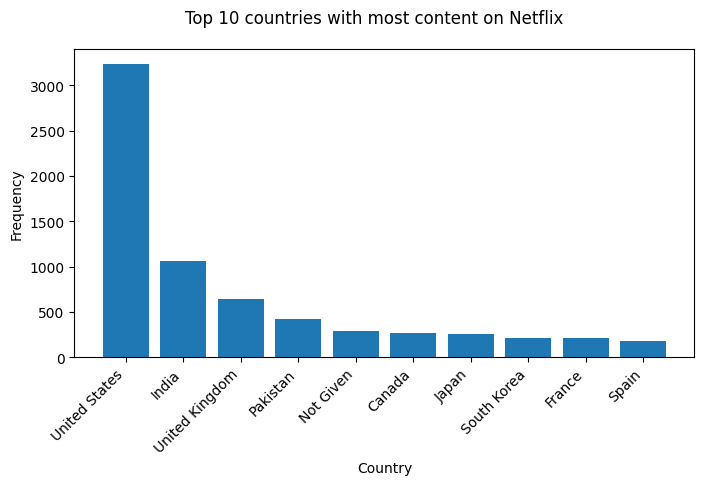

In [172]:
top_ten_countries=df['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(8, 4))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

#Monthly releases of Movies and TV shows on Netflix

In [173]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day


In [174]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TVShow']['month'].value_counts().sort_index()


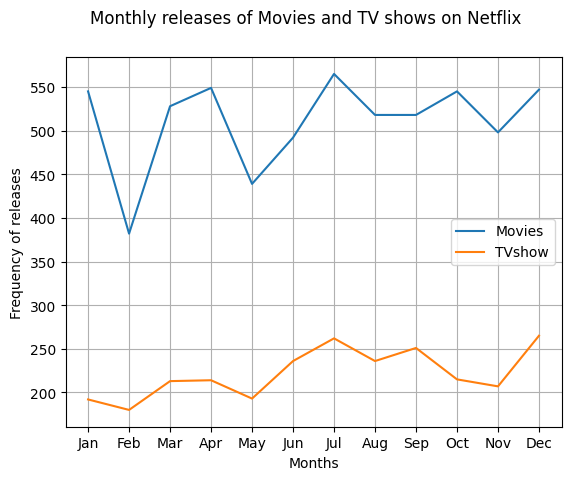

In [175]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='TVshow')

plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

#Yearly releases of Movies and TV Shows on Netflix

In [176]:
yearly_movie_releases=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year'].value_counts().sort_index()




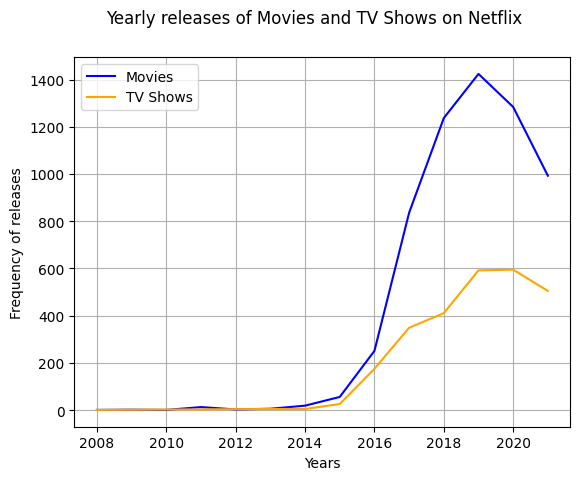

In [177]:
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', color = 'blue')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', color = 'orange')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()


#Top 10 popular movie genres

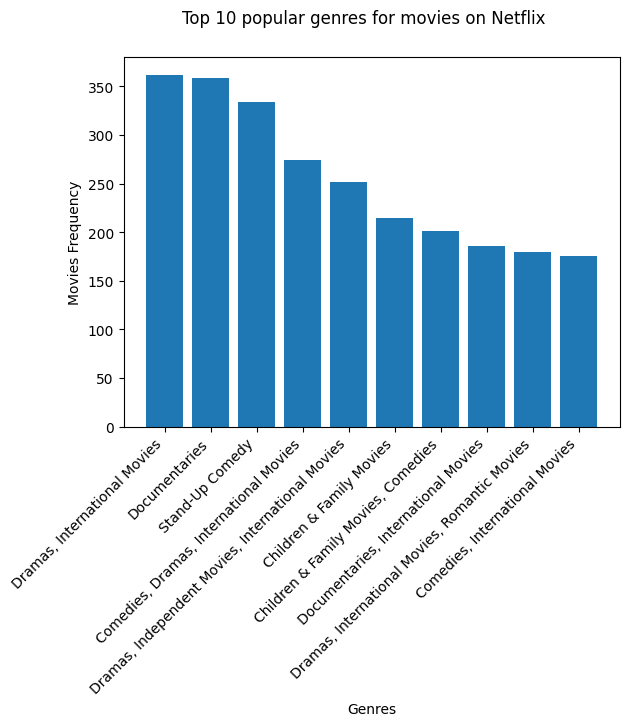

In [178]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]


plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

#Top 10 TV Shows genres


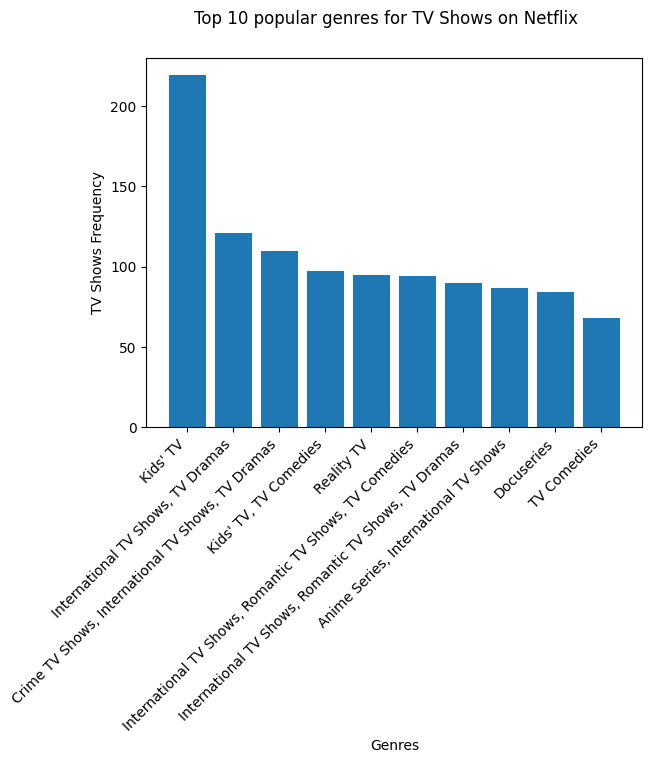

In [182]:
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

##Top 15 directors across Netflix with hoigh frequency of movies and shows

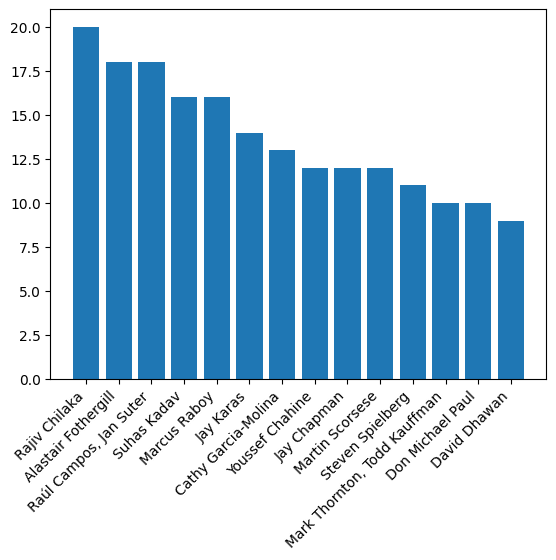

In [181]:
directors=df['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')
plt.show()

##Conclusion and Insights
simplified and concise conclusions from the Netflix Data: Cleaning, Analysis, and Visualization project:

### Key Conclusions:

1. **Content Diversity and Trends**:
   - **Popular Genres**: Identified which genres dominate Netflix and how they’ve changed over time.
   - **Release Patterns**: Found trends in content releases, such as peak years and months for new titles.

2. **Ratings and Audience Preferences**:
   - **Ratings Insights**: Discovered which types of content receive the highest viewer ratings and if certain genres are favored.
   - **Content Length**: Analyzed whether viewers prefer shorter or longer movies and series.

3. **International Reach**:
   - **Regional Contributions**: Determined which countries provide the most content, showing Netflix’s global presence.

4. **Key Contributors**:
   - **Top Talent**: Identified the most frequent directors and actors, highlighting their influence on audience attraction.

5. **Future Analysis Opportunities**:
   - **Machine Learning**: Suggested potential for developing recommendation systems and predictive models to analyze future viewership trends.

### Overall Summary:
The project emphasizes the significance of data cleaning and visualization in extracting actionable insights, aiding businesses in understanding audience preferences and shaping content strategies.